# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
C/A                                                                     197625 non-null object
UNIT                                                                    197625 non-null object
SCP                                                                     197625 non-null object
STATION                                                                 197625 non-null object
LINENAME                                                                197625 non-null object
DIVISION                                                                197625 non-null object
DATE                                                                    197625 non-null object
TIME                                                                    197625 non-null object
DESC                                                                    197625 non-null object
ENTRIES                           

# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [4]:
new_cols = [col.lower() for col in df.columns]
df.columns = new_cols
df.head(2)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


# Change the Index to be the Line Names

In [5]:
df = df.set_index('linename')
df.head(2)

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


# Painstakingly change the index back

In [6]:
df = df.reset_index()
df.head(2)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [7]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.head(2)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7


## Write a function to clean a column name.

In [8]:
def clean(col_name):
    cleaned = col_name.title()
    return cleaned

In [9]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.

df.columns = [clean(col) for col in df.columns] 

In [10]:
# Checking the output, we can see the results.
df.columns
# df.head(2)

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [11]:
# Check if changing the date column runs without error
pd.to_datetime(df.Date).head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: Date, dtype: datetime64[ns]

In [12]:
# Change date column in date-type
df.Date = pd.to_datetime(df.Date)

In [13]:
# Extract d-o-w
df['Day_of_week'] = df.Date.dt.dayofweek
df.head(2)

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5


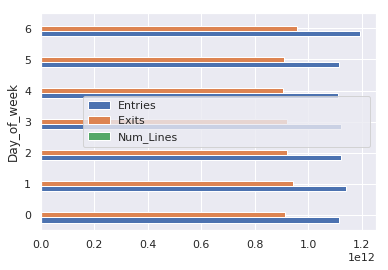

In [14]:
# Compare
grouped = df.groupby('Day_of_week').sum()
grouped.plot(kind='barh');

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [15]:
grouped.head(2)

,Entries,Exits,Num_Lines
Day_of_week,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303


In [16]:
grouped = grouped.reset_index()
grouped.head(2)

,Day_of_week,Entries,Exits,Num_Lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303


In [17]:
# sort days in weekend and non-weekend
grouped['Is_Weekend'] = grouped.Day_of_week.map({0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True})
grouped.head(2)

,Day_of_week,Entries,Exits,Num_Lines,Is_Weekend
0,0,1114237052454,911938153513,76110,False
1,1,1143313287046,942230721477,77303,False


In [18]:
# group by and calculate the mean
wkend_traffic = grouped.groupby('Is_Weekend').mean()

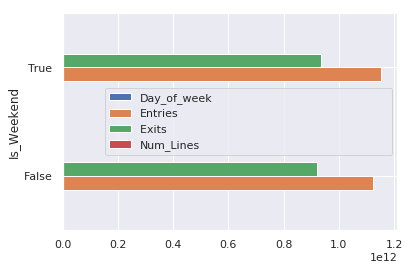

In [19]:
# plot 1 works
wkend_traffic.plot(kind='barh');

In [20]:
# plot 2 does not work
wkend_traffic[['Entries', 'Exits']].plot(kind='barh');

KeyError: "['Exits'] not in index"

# Drop a couple of columns

In [21]:
df.head(2)

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5


In [22]:
df = df.drop(['C/A', 'Scp'], axis=1)
df.head(2)

,Linename,Unit,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5
